In [5]:
!pip install fredapi



# Getting Started!



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'dd82f9dcc34b7dfd019a9004d8a5af10'

In [8]:
fred = Fred(api_key=fred_key)

In [9]:
sp_search = fred.search('S&P', order_by='popularity')

In [10]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-10-15,2025-10-15,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-10-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-15 10:07:49-05:00,99,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-10-15,2025-10-15,S&P 500,2015-10-15,2025-10-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-10-14 19:02:07-05:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-10-15,2025-10-15,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-09-30 08:11:02-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-10-15,2025-10-15,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-10-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-15 10:07:53-05:00,86,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-10-15,2025-10-15,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-10-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-15 10:09:05-05:00,84,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# Pull Raw Data & Plot

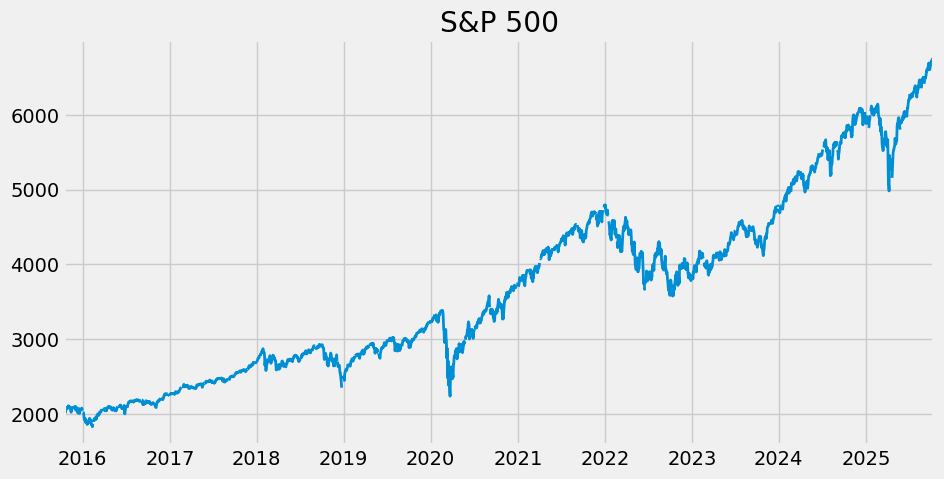

In [11]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

# Pull and Join Multiple Data Series

In [14]:
unemp_results=fred.search('Unemployment')


In [16]:
unrate=fred.get_series('UNRATE')

In [17]:
unrate

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2025-04-01,4.2
2025-05-01,4.2
2025-06-01,4.1
2025-07-01,4.2


<Axes: >

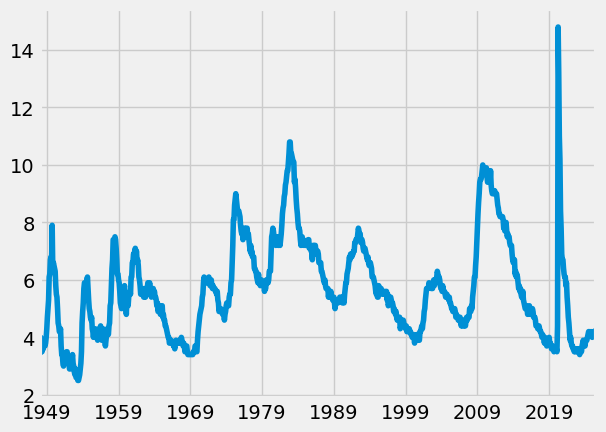

In [19]:
unrate.plot()

In [15]:

unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-10-15,2025-10-15,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-10-15,2025-10-15,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,61,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-10-15,2025-10-15,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,74,The series comes from the 'Current Population ...
NROU,NROU,2025-10-15,2025-10-15,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,70,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-10-15,2025-10-15,Continued Claims (Insured Unemployment),1967-01-07,2025-09-13,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-09-25 07:33:02-05:00,73,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC399040010,ENUC399040010,2025-10-15,2025-10-15,Average Weekly Wages for Employees in Total Co...,1990-01-01,2025-01-01,Quarterly,Q,Dollars per Week,$ per Week,Not Seasonally Adjusted,NSA,2025-09-09 11:21:08-05:00,1,Average weekly wages are the wages paid by une...
ENUC399040010SA,ENUC399040010SA,2025-10-15,2025-10-15,Average Weekly Wages for Employees in Total Co...,1990-01-01,2025-01-01,Quarterly,Q,Dollars per Week,$ per Week,Seasonally Adjusted,SA,2025-09-09 11:24:20-05:00,1,Average weekly wages are the wages paid by une...
IPUEN321L020000000,IPUEN321L020000000,2025-10-15,2025-10-15,Labor Compensation for Manufacturing: Wood Pro...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:23:39-05:00,1,"Labor compensation, defined as payroll plus su..."


# Unemployment Rate By State

In [24]:
fred.search('unemployment state', filter=('frequency','Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-10-15,2025-10-15,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-10-15,2025-10-15,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,61,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-10-15,2025-10-15,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,74,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-10-15,2025-10-15,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 07:50:08-05:00,29,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-10-15,2025-10-15,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,72,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDCECI0LFN,MDCECI0LFN,2025-10-15,2025-10-15,"Civilian Labor Force in Cecil County, MD",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:36:11-05:00,1,These data come from the Current Population Su...
CASANJ8LFN,CASANJ8LFN,2025-10-15,2025-10-15,"Civilian Labor Force in San Joaquin County, CA",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:34:28-05:00,1,These data come from the Current Population Su...
LAUCN510570000000005,LAUCN510570000000005,2025-10-15,2025-10-15,"Employed Persons in Essex County, VA",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:11:05-05:00,1,These data come from the Current Population Su...


In [25]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [26]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
uemp_results = pd.concat(all_results, axis=1)

In [27]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [28]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [29]:
# Plot States Unemployment Rate
px.line(uemp_states)

# April 2020 Unemployment Rate Per State

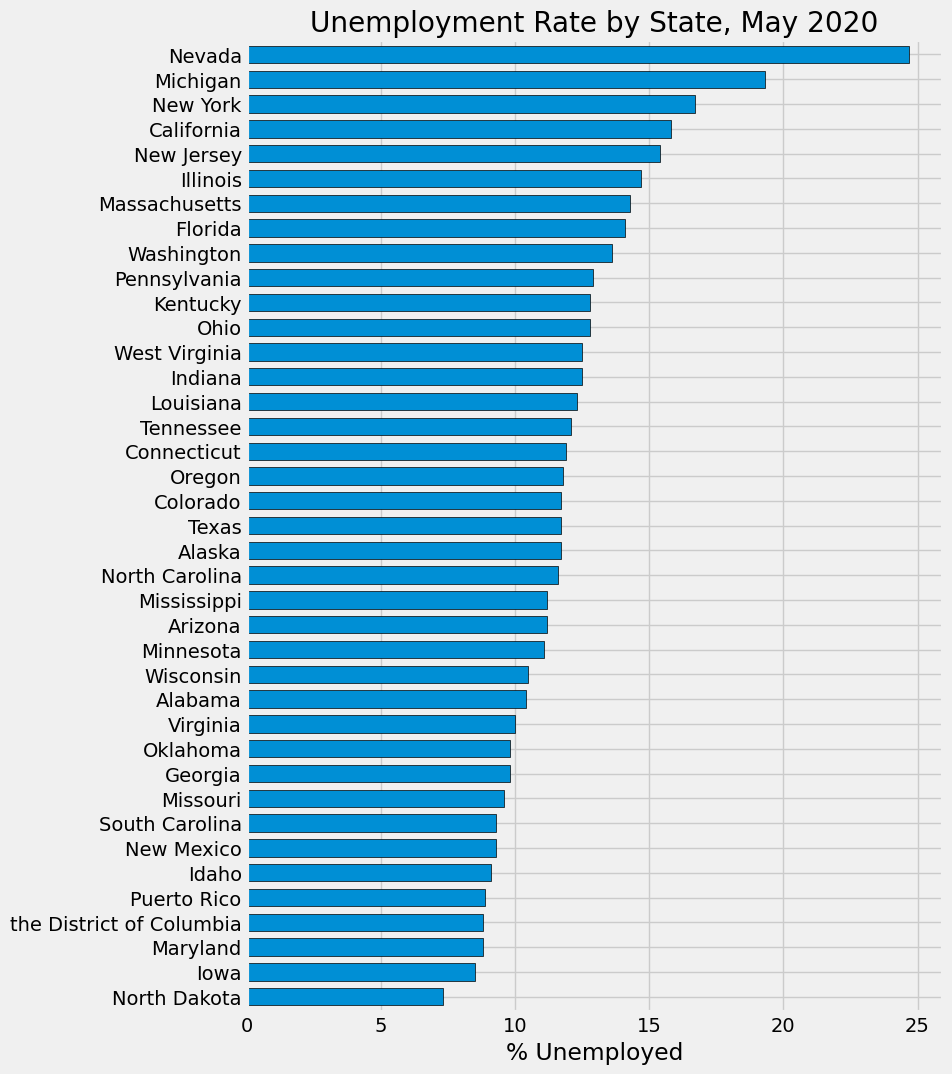

In [30]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull April 2020 Unemployment Rate Per State

In [31]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [32]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

In [33]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

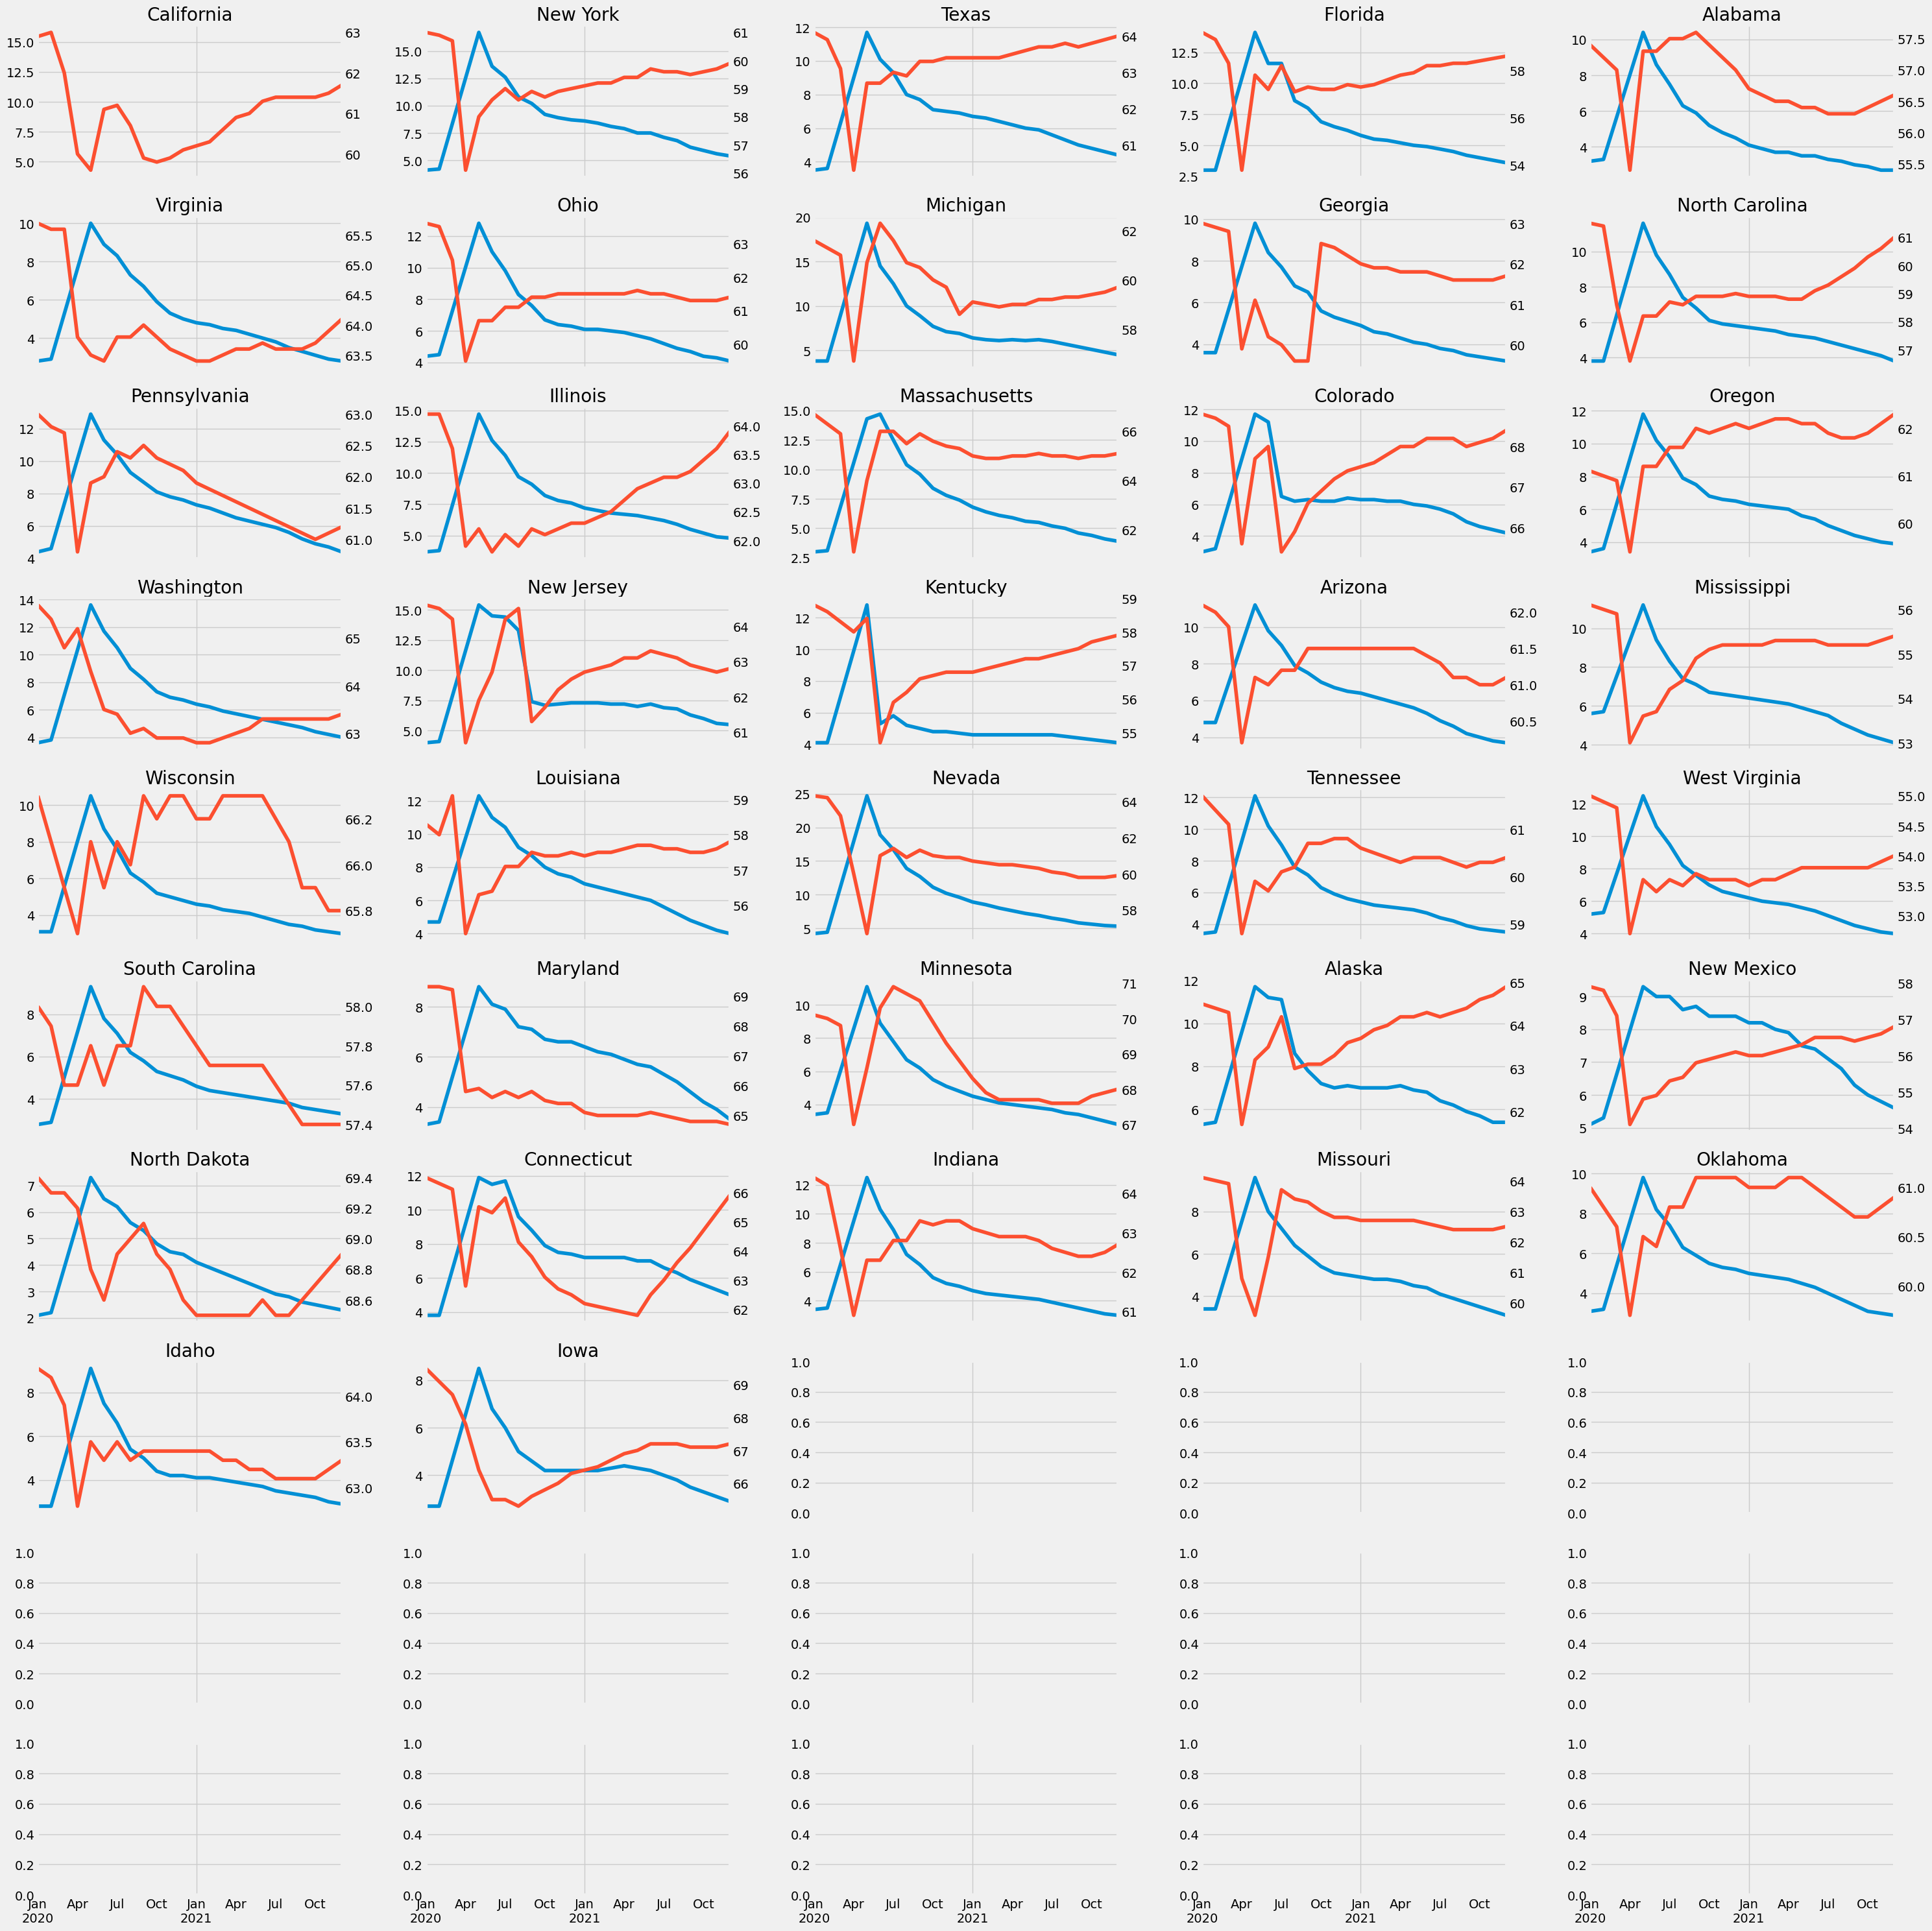

In [34]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

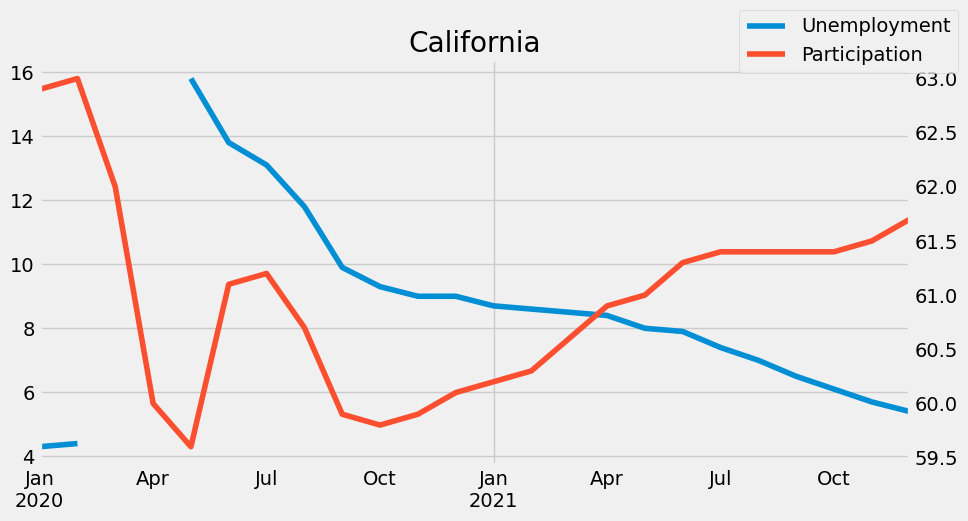

In [35]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()